1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Load and clean data

In [2]:
df = pd.read_csv("Internetusage.csv")
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')

def parse_duration(x):
    try:
        h, m, s = map(int, str(x).split(':'))
        return h*3600 + m*60 + s
    except:
        return np.nan

df['session_seconds'] = df['usage_time'].apply(parse_duration)

for col in ['upload', 'download', 'total_transfer']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['hour_of_day'] = df['start_time'].dt.hour
df['day_of_week'] = df['start_time'].dt.dayofweek

df['session_intensity'] = df['total_transfer'] / df['session_seconds']





3. EDA

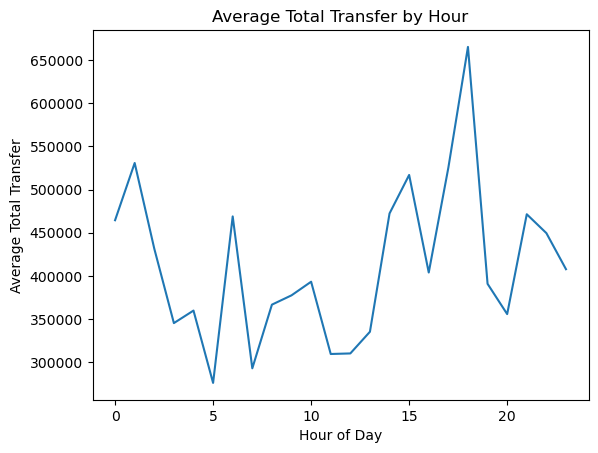

In [3]:
hourly_load = df.groupby('hour_of_day')['total_transfer'].mean()

plt.figure()
hourly_load.plot()
plt.title("Average Total Transfer by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Total Transfer")
plt.show()


4. Train Test Split

In [21]:
df = df[
    df['hour_of_day'].notna() &
    df['day_of_week'].notna()
]

from sklearn.model_selection import train_test_split

x = df[['hour_of_day', 'day_of_week']]
y = df[ 'total_transfer']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42
)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)



5. Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(x_train_imputed, y_train)

y_pred_lr = lr.predict(x_test_imputed)

print("Linear Regression R^2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))


Linear Regression R^2: 0.0019234842213881054
Linear Regression RMSE: 950565.6047380808


6. Random Forest Regression

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(x_train_imputed, y_train)

y_pred_rf = rf.predict(x_test_imputed)

print("Random Forest R^2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


Random Forest R^2: -0.057256964704913704
Random Forest RMSE: 978341.4515268187


7. Scatter Plot

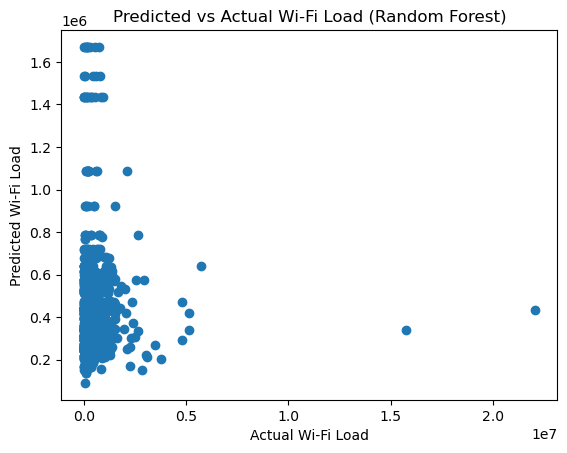

In [24]:
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Wi-Fi Load")
plt.ylabel("Predicted Wi-Fi Load")
plt.title("Predicted vs Actual Wi-Fi Load (Random Forest)")
plt.show()
